In [1]:
import os, sys, glob
import numpy as np
import scipy.signal as sigpro
import scipy.linalg as scpla

from tqdm.notebook import tqdm

%matplotlib notebook
import matplotlib.pyplot as plt

# Problem 7

In [12]:
fnprob = os.path.join(os.getcwd(), 'p7a_input.txt')

with open(fnprob, 'r') as fid:
    txtin = fid.read()
xin = np.array([int(a) for a in txtin.strip().split(',')])
#print(xin)

#should be the median
xmed = np.median(xin)

print(xmed)

#now check
xv = np.zeros(1000)
for ii in range(1000):
    nn = np.abs(xin-ii)
    xv[ii] = np.sum((nn**2 + nn)/2)
print(xv.argmin())    
print(xv.min())

339.0
478
96086265.0


In [13]:
# Problem 8

In [102]:
def p8parse(ln):
    lnab = ln.strip().split('|')
    sig = lnab[0].strip().split(' ')
    out = lnab[1].strip().split(' ')
    return sig, out
if True:
    with open('p8a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
    # print(data_in)
else:
    data_in = ['be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe',
           'edbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc',
           'fgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg',
           'fbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb',
           'aecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea',
           'fgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb',
           'dbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe',
           'bdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef',
           'egadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb',
           'gcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce']
    #data_in = ['acedgfb cdfbe gcdfa fbcad dab cefabd cdfgeb eafb cagedb ab | cdfeb fcadb cdfeb cdbaf']


num2ltr = ['abcefg', 'cf', 'acdeg', 'acdfg', 'bcdf', 'abdfg', 'abdefg', 'acf', 'abcdefg', 'abcdfg']
ltr2num = {}
for ii in range(10):
    ltr2num[num2ltr[ii]] = ii
    print('{} seq {} length {}'.format(ii, num2ltr[ii], len(num2ltr[ii])))
print(ltr2num)
counts = np.zeros(10, dtype='int')
unis = np.array([1, 4, 7, 8], dtype='int')
for d in data_in:
    sig, out = p8parse(d)
    #Just counting the 1, 4, 7, 8
    for o in out:
        if len(o) == len(num2ltr[1]):
            # print('Potential 1 {}'.format(o))
            counts[1]+=1
        elif len(o) == len(num2ltr[4]):
            counts[4]+=1
        elif len(o) == len(num2ltr[7]):
            counts[7]+=1
        elif len(o) == len(num2ltr[8]):
            counts[8]+=1
print(counts)
print(sum(counts))

0 seq abcefg length 6
1 seq cf length 2
2 seq acdeg length 5
3 seq acdfg length 5
4 seq bcdf length 4
5 seq abdfg length 5
6 seq abdefg length 6
7 seq acf length 3
8 seq abcdefg length 7
9 seq abcdfg length 6
{'abcefg': 0, 'cf': 1, 'acdeg': 2, 'acdfg': 3, 'bcdf': 4, 'abdfg': 5, 'abdefg': 6, 'acf': 7, 'abcdefg': 8, 'abcdfg': 9}
[  0  97   0   0 112   0   0  73 105   0]
387


In [103]:
def build_subs(stin):
    subs = {'a':'abcdefg',
           'b':'abcdefg',
           'c':'abcdefg',
           'd':'abcdefg',
           'e':'abcdefg',
           'f':'abcdefg',
           'g':'abcdefg'}
    #find the uniques of each length
    uni = {}
    for ilen in range(2,8):
        uni[ilen] = []
    
    ltrs = [a for a in 'abcdefg']
    
    for s in stin:
        il = len(s)
        ss = ''.join(sorted(s))
        if not ss in uni[il]:
            uni[il].append(ss)
    #print(uni)
    #print(subs)
    #check if the set is complete?
    if len(uni[2]) == 1 and len(uni[3]) == 1 and len(uni[4]) == 1 and len(uni[5]) == 3 and len(uni[6]) == 3:
        #use the length 2
        if all([uni[2][0][0] in u for u in uni[6]]):
            #print('Right side')
            subs[uni[2][0][0]] = 'f'
            subs[uni[2][0][1]] = 'c'
            onetop = uni[2][0][1]
            onebot = uni[2][0][0]
        else:
            #print('Right side')
            subs[uni[2][0][0]] = 'c'
            subs[uni[2][0][1]] = 'f'
            onetop = uni[2][0][0]
            onebot = uni[2][0][1]
        for l in ltrs:
            if l not in uni[2][0]:
                subs[l] = subs[l].replace('c','').replace('f','')
            #else:
            #    print('{} is in {}'.format(l, uni[2][0]))
        #now use the tope of 7 to resolve the 
        for svntop in uni[3][0]:
            if not svntop in uni[2][0]:
                subs[svntop] = 'a'
                for l in ltrs:
                    if l != svntop:
                        subs[l] = subs[l].replace('a','')
                break
        #now use the 4 and zeros to resolve the middle
        for m4 in uni[4][0]:
            if m4 not in uni[2][0]:
                this = False
                for chk6 in uni[6]:
                    if m4 not in chk6:
                        this = True
                        subs[m4] = 'd'
                        for l in ltrs:
                            if l != m4:
                                subs[l] = subs[l].replace('d','')
                

        # use 2 to resolve b and 5/6 to resolve e (and b)
        for m6er in uni[6]:
            if onetop not in m6er:
                #this is a 6
                break
        
        for m5er in uni[5]:
            if onetop not in m5er:
                #this is a 5
                for l6 in m6er:
                    if not l6 in m5er:
                        subs[l6] = 'e'
                        for l in ltrs:
                            if l != l6:
                                subs[l] = subs[l].replace('e','')
            elif onebot not in m5er:
                #this is a two
                for l2 in ltrs:
                    if l2 != onebot:
                        if l2 not in m5er:
                            subs[l2] = 'b'
                            for l in ltrs:
                                if l != l2:
                                    subs[l] = subs[l].replace('b','')
            
        #print(subs)
    else:
        print('gotta handle a new case.')
        return None
    numsout = np.zeros(len(stin), dtype = 'int')
    for ithis, s in enumerate(stin):
        sn = ''
        for l in s:
            sn = sn + subs[l]
        sns = ''.join(sorted(sn))
        #print(s+' = '+sns)
        numsout[ithis] = ltr2num[sns]
    return numsout
    
    

ct = 0

for d in data_in:
    sig, out = p8parse(d)
    #print(d)
    nums = build_subs(sig+out)
    #print(nums[-4:])
    ct += nums[-1]+10*nums[-2]+100*nums[-3]+1000*nums[-4]
print(ct)
    


986034


# Problem 9

514
[0.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00
 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 4.000e+00 4.000e+00 5.000e+00 6.000e+00 6.000e+00 6.000e+00
 6.000e+00 6.000e+00 6.000e+00 6.000e+00 7.000e+00 7.000e+00 7.000e+00
 7.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00
 8.000e+00 9.000e+00 9.000e+00 9.000e+00 9.000e+00 9.000e+00 1.000e+01
 1.000e+01 1.000e+01 1.000e+01 1.000e+01 1.000e+01 1.100e+01 1.100e+01
 1.100e+01 1.100e+01 1.200e+01 1.200e+01 1.200e+01 1.200e+01 1.200e+01
 1.200e+01 1.300e+01 1.300e+01 1.300e+01 1.300e+01 1.300e+01 1.300e+01
 1.400e+01 1.400e+01 1.400e+01 1.400e+01 1.400e+01 1.500e+01 1.500e+01
 1.500e+01 1.500e+01 1.500e+01 1.500e+01 1.600e+01 1.600e+01 1.600e+01
 1.600e+01 1.600e+01 1.700e+01 1.700e+01 1.700e+01 1.800e+01 1.800e+01
 1.800e+01 1.900e+01 1.900e+01 1.900e+01 1.900e+01 1.900e+01 1.900e+01
 1

<IPython.core.display.Javascript object>


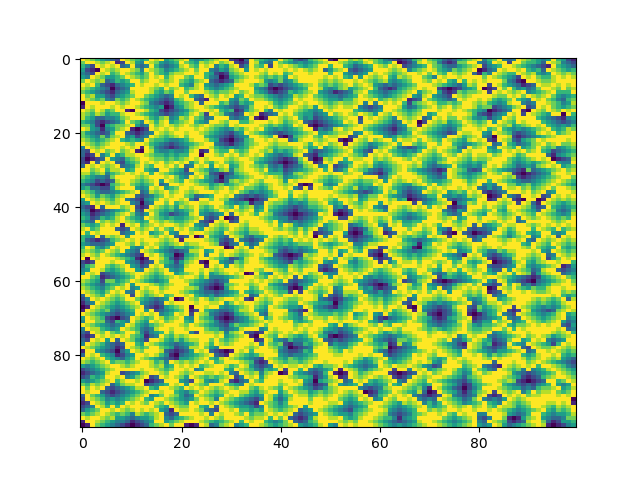

<IPython.core.display.Javascript object>


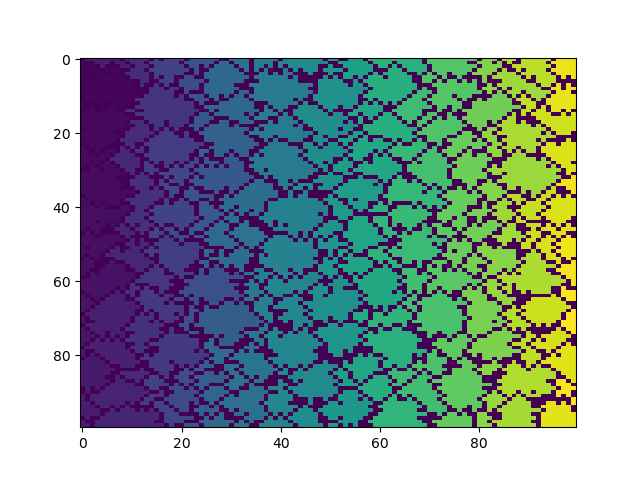

In [149]:


if True:
    with open('p9a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in = [
        '2199943210',
        '3987894921',
        '9856789892',
        '8767896789',
        '9899965678'
    ]
    
for irow, datarow in enumerate(data_in):
    drow = np.array([int(a) for a in datarow])
    if irow == 0:
        d_in = np.atleast_2d(drow)
    else:
        d_in = np.concatenate([d_in, np.atleast_2d(drow)], axis=0)
risk = 0
dmax = d_in.max()

#print(d_in)
#print(dmax - d_in)

nr, nc = d_in.shape
for ic in range(nc):
    #print('-'*20)
    dca = np.zeros(nr+2)
    dca[1:-1] = dmax-d_in[:, ic]
    #print(dca)
    idpks, rpks = sigpro.find_peaks(dca)
    #print(idpks)
    for ipk in idpks-1:
        comp = []
        if ipk==0:
            comp.append(d_in[ipk+1, ic])
        elif ipk == nr-1:
            comp.append(d_in[ipk-1, ic])
        else:
            comp.append(d_in[ipk+1, ic])
            comp.append(d_in[ipk-1, ic])
        if ic == 0:
            comp.append(d_in[ipk, ic+1])
        elif ic == nc-1:
            comp.append(d_in[ipk, ic-1])
        else:
            comp.append(d_in[ipk, ic-1])
            comp.append(d_in[ipk, ic+1])
        #print('peak at index {},{} of {} compared to {}'.format(ipk, ic, d_in[ipk, ic], comp))
        if d_in[ipk, ic] < np.array(comp).min():
            #print('adding at {},{}'.format(ipk, ic))
            risk += 1+d_in[ipk, ic]

print(risk)


#find the basins

def grow_basin(dbasin, ir, ic):
    br, bc = dbasin.shape
    if ic>0:
        if dbasin[ir, ic-1] == 0:
            dbasin[ir, ic-1] = dbasin[ir, ic]
            dbasin = grow_basin(dbasin, ir, ic-1)
    if ir>0:
        if dbasin[ir-1, ic] == 0:
            dbasin[ir-1, ic] = dbasin[ir, ic]
            dbasin = grow_basin(dbasin, ir-1, ic)
    if ic<bc-1:
        if dbasin[ir, ic+1] == 0:
            dbasin[ir, ic+1] = dbasin[ir, ic]
            dbasin = grow_basin(dbasin, ir, ic+1)
    if ir<br-1:
        if dbasin[ir+1, ic] == 0:
            dbasin[ir+1, ic] = dbasin[ir, ic]
            dbasin = grow_basin(dbasin, ir+1, ic)
    return dbasin
        

d9s = -1*(d_in == 9)

bct = 0
for ic in range(nc):
    for ir in range(nr):
        if d9s[ir,ic] == 0:
            if ir > 0 and ic > 0:
                if d9s[ir-1, ic] > 0:
                    d9s[ir,ic] = d9s[ir-1, ic]
                elif d9s[ir, ic-1] > 0:
                    d9s[ir,ic] = d9s[ir, ic-1]
                else:
                    bct += 1
                    d9s[ir,ic] = bct
            elif ir > 0:
                if d9s[ir-1, ic] > 0:
                    d9s[ir,ic] = d9s[ir-1, ic]
                else:
                    bct += 1
                    d9s[ir,ic] = bct
            elif ic > 0:
                if d9s[ir, ic-1] > 0:
                    d9s[ir,ic] = d9s[ir, ic-1]
                else:
                    bct += 1
                    d9s[ir,ic] = bct
            else:
                bct += 1
                d9s[ir,ic] = bct
            #now grow it
            d9s = grow_basin(d9s, ir, ic)
            

basinct = np.zeros(bct+2)                
for ii in range(-1, bct+1):
    basinct[ii+1] = np.sum(d9s == ii)
print(np.sort(basinct))
print(np.argsort(basinct)-1)
print(np.prod(np.sort(basinct)[-4:-1]))


_=plt.figure()
_=plt.imshow(d_in, aspect='auto')
_=plt.figure()
_=plt.imshow(d9s, aspect='auto')


# Problem 10

In [170]:


if True:
    with open('p10a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in = ['[({(<(())[]>[[{[]{<()<>>',
            '[(()[<>])]({[<{<<[]>>(',
            '{([(<{}[<>[]}>{[]{[(<()>',
            '(((({<>}<{<{<>}{[]{[]{}',
            '[[<[([]))<([[{}[[()]]]',
            '[{[{({}]{}}([{[{{{}}([]',
            '{<[[]]>}<{[{[{[]{()[[[]',
            '[<(<(<(<{}))><([]([]()',
            '<{([([[(<>()){}]>(<<{{',
            '<{([{{}}[<[[[<>{}]]]>[]]']

def blk_valid(blk):
    openers = '({[<'
    closers = '>]})'
    pairs = ['()', '[]', '{}', '<>']
    # ): 3 points.
    # ]: 57 points.
    # }: 1197 points.
    # >: 25137 points.
    scoring = np.array([3, 57, 1197, 25137])
    rescore = np.array([1,2,3,4])
    ops = ''
    for s in blk:
        if s in openers:
            ops = ops+s
        else:
            v = False
            for ip, p in enumerate(pairs):
                if s == p[1]:
                    ipthis = ip
                    if p[0] == ops[-1]:
                        v = True
                        # print('valid')
                        ops = ops[:-1]
            if not v:
                return scoring[ipthis], 0
    compscore = 0
    #print(ops)
    while len(ops) > 0:
        ipthis = -1
        for ip, p in enumerate(pairs):
            if len(ops)>1:
                if ops[-1] == p[0]:
                    ipthis = ip
                    ops = ops[:-1]
                    break
            elif ops == p[0]:
                ipthis = ip
                ops = ''
                break
        #print(ops)
        if ipthis < 0:
            print('uh oh!!!')
        compscore *= 5
        compscore += ipthis+1
        #print(compscore)
                               
    return 0, compscore
            
st = 0
st2 = []
for blk in data_in:
    sthis, sthat = blk_valid(blk)
    st += sthis
    if sthis == 0:
        st2.append(sthat)
    #print('sthis = {} sthat = {}'.format(sthis, sthat))
    
print('Total score {}'.format(st))
print('Median is {}'.format(np.median(np.array(st2))))

Total score 168417
Median is 2802519786.0


# Problem 11

In [225]:

if True:
    with open('p11a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in = ['5483143223',
                '2745854711',
                '5264556173',
                '6141336146',
                '6357385478',
                '4167524645',
                '2176841721',
                '6882881134',
                '4846848554',
                '5283751526']
#     data_in = ['11111',
#             '19991',
#             '19191',
#             '19991',
#             '11111']
din = np.zeros((len(data_in), len(data_in[0])), dtype = 'int')
for irow, row in enumerate(data_in):
    #print(irow)
    #print(row)
    for il, l in enumerate(row):
        #print(il, l)
        din[irow, il] = int(data_in[irow][il], base=10)


    

def up_and_flash(din, flct=0):
    mask = np.ones_like(din)
    n, m = din.shape
    #print('Dimensions n={}, m={}'.format(n, m))
    dout = din.copy()
    dout += 1
    while True:
        #print('Still moving {}'.format(np.sum(dout>9)))
        if np.sum(dout>9) == 0:
            break
        idr, idc = np.where(dout > 9)
        #print('idr = {}, idc = {}'.format(idr, idc))
        for ii in range(len(idr)):
            #print('idr={}, idc={}'.format(idr[ii], idc[ii]))
            
            flct += 1
            mask[idr[ii], idc[ii]] = 0
            ir = np.arange(np.maximum(0, idr[ii]-1), np.minimum(n, idr[ii]+2))
            ic = np.arange(np.maximum(0, idc[ii]-1), np.minimum(m, idc[ii]+2))
            #print(ir)
            #print(ic)
            for i1 in ir:
                for i2 in ic:
                    #print('adding {},{}'.format(i1,i2))
                    dout[i1,i2] += 1
        dout *= mask
        #print(dout)
        
    return dout, flct
    
print('starting')

print(din)
doo = din.copy()
ct = 0
for ii in range(1000000):
    doo, flct = up_and_flash(doo, flct=0)
    ct += flct
    print('iteration {}, flashes {}'.format(ii+1,ct))
    if flct ==100:
        break
print(doo)

starting
[[1 5 6 4 5 2 4 2 2 6]
 [1 3 8 4 5 5 4 6 8 5]
 [7 5 8 2 2 6 4 8 3 5]
 [8 8 1 2 6 7 2 2 7 2]
 [1 1 6 1 4 6 3 1 3 7]
 [7 8 3 1 7 6 2 3 4 4]
 [2 8 5 5 5 2 7 7 4 8]
 [6 1 4 1 7 3 7 8 7 4]
 [8 6 1 1 4 5 8 3 1 3]
 [8 2 1 5 3 7 2 4 4 3]]
iteration 1, flashes 0
iteration 2, flashes 34
iteration 3, flashes 83
iteration 4, flashes 98
iteration 5, flashes 99
iteration 6, flashes 109
iteration 7, flashes 115
iteration 8, flashes 145
iteration 9, flashes 189
iteration 10, flashes 210
iteration 11, flashes 214
iteration 12, flashes 219
iteration 13, flashes 224
iteration 14, flashes 253
iteration 15, flashes 301
iteration 16, flashes 313
iteration 17, flashes 316
iteration 18, flashes 325
iteration 19, flashes 330
iteration 20, flashes 358
iteration 21, flashes 407
iteration 22, flashes 418
iteration 23, flashes 427
iteration 24, flashes 429
iteration 25, flashes 436
iteration 26, flashes 464
iteration 27, flashes 511
iteration 28, flashes 528
iteration 29, flashes 532
iteration 30, flashes

# Problem 12

In [303]:
import math
if False:
    with open('p12a_input.txt','r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in = ['start-A',
                'start-b',
                'A-c',
                'A-b',
                'b-d',
                'A-end',
                'b-end']
    data_in2 = [
            'dc-end',
            'HN-start',
            'start-kj',
            'dc-start',
            'dc-HN',
            'LN-dc',
            'HN-end',
            'kj-sa',
            'kj-HN',
            'kj-dc',]
    data_in3 = [
            'fs-end',
            'he-DX',
            'fs-he',
            'start-DX',
            'pj-DX',
            'end-zg',
            'zg-sl',
            'zg-pj',
            'pj-he',
            'RW-he',
            'fs-DX',
            'pj-RW',
            'zg-RW',
            'start-pj',
            'he-WI',
            'zg-he',
            'pj-fs',
            'start-RW']

def pmask(lst, strt, norevisit = None):
    mask = np.zeros(len(lst), dtype = 'int')
    for ils, ls in enumerate(lst):
        if ls.startswith(strt):
            mask[ils] = 1
            if not norevisit is None:
                for nono in norevisit:
                    if ls.endswith(nono):
                        mask[ils] = 0
                        break
    return mask
def maskp(lst, strt):
    mask = np.zeros(len(lst), dtype = 'int')
    for ils, ls in enumerate(lst):
        if ls.endswith(strt):
            mask[ils] = 1
    return mask


    
def build_paths(dta, room='start', notagain = [], allowedtwice='None'):
    nd = len(dta)
    at = allowedtwice + ''
    #print('starting with:')
    #print(dta)
    print(room)
    #print(notagain)
    #The max number of paths is nd!
    # print('{} nodes yields a max of {} paths'.format(nd, math.factorial(nd)))
    #each path will just be the indeces
    paths = []
    msk = pmask(dta, room, norevisit=notagain)
    if np.sum(msk) == 0:
        #print('invalid path')
        return None
    pls = np.where(msk)[0]
    dprint = False
    for ip in pls:
        nxtrm = dta[ip].split('-')[-1]
        if nxtrm == 'd':
            print('made it to d, {}'.format(notagain))
            dprint = True
        if nxtrm == 'end':
            #print('Found an end {}'.format(ip))
            paths.append([ip])
        else:
            # get the next one
            zdta = dta.copy()
            #zdta[ip] = '#'+zdta[ip] #so we don't try the same path again
            if room == room.lower():
                if room == allowedtwice:
                    at = 'None'
                elif not room in notagain:
                    notagain.append(room)
            #print(ip) 
            #print(zdta)
            ptt = build_paths(zdta, room=nxtrm, notagain=notagain.copy(), allowedtwice=at)
            if dprint:
                print('{} :: {}'.format(ip, ptt))
            if not ptt is None:
                #print('Received {}'.format(ptt))
                for pta in ptt:
                    #print('List element {}, ip={}'.format(pta, ip))
                    thispath = [ip]+pta
                    #print('\tbecomes {}'.format(thispath))
                    paths.append(thispath)
    #print('returning {}'.format(paths))
    return paths
    
dtt = []
allsmall = []

for dt in data_in:
    dtsplit = dt.split('-')
    for dtp in dtsplit:
        if not (dtp == 'start' or dtp == 'end'):
            if dtp == dtp.lower():
                if not dtp in allsmall:
                    allsmall = allsmall + [dtp]
        
    if dt.startswith('start'):
        dtt.append(dt)
    elif dt.endswith('end'):
        dtt.append(dt)
    else:
        dtt.append(dt)
        adt = dt.split('-')
        dtt.append(adt[1]+'-'+adt[0])
        

print(allsmall)
print(dtt)

ptk = []
for asm in allsmall:
    pths = build_paths(dtt.copy(), allowedtwice=asm)
    print(len(pths))
    for pth in pths:
        if not pth in ptk:
            ptk.append(pth)

print(len(ptk))

for pt in ptk:
    for ip in pt:
        print('{} '.format(dtt[ip].split('-')[0]), end = '')
    print('end')
        
    

['b', 'c', 'd']
['start-A', 'start-b', 'A-c', 'c-A', 'A-b', 'b-A', 'b-d', 'd-b', 'A-end', 'b-end']
start
A
c
A
b
A
b
A
made it to d, ['start', 'c', 'b']
d
6 :: None
made it to d, ['start', 'c']
d
b
A
6 :: []
b
A
c
A
b
A
made it to d, ['start', 'c', 'b']
d
6 :: None
b
A
c
A
made it to d, ['start', 'b']
d
6 :: None
made it to d, ['start']
d
b
A
c
A
6 :: []
b
A
c
A
b
A
made it to d, ['start', 'c', 'b']
d
6 :: None
b
A
c
A
made it to d, ['start', 'b']
d
6 :: None
made it to d, ['start']
d
b
A
c
A
6 :: []
22
start
A
c
A
c
A
b
A
made it to d, ['start', 'c', 'b']
d
6 :: None
b
A
c
A
made it to d, ['start', 'b']
d
6 :: None
b
A
c
A
c
A
made it to d, ['start', 'b']
d
6 :: None
b
A
c
A
c
A
made it to d, ['start', 'b']
d
6 :: None
16
start
A
c
A
b
A
made it to d, ['start', 'c', 'b']
d
6 :: None
b
A
c
A
made it to d, ['start', 'b']
d
6 :: None
b
A
c
A
made it to d, ['start', 'b']
d
6 :: None
10
28
start A c A b A b A end
start A c A b A b end
start A c A b A end
start A c A b end
start A c A end
s

In [290]:
a1 = [1,2,3]
print(a1)
print([9]+a1)

[1, 2, 3]
[9, 1, 2, 3]
